# Geospatial

- Authors: Tom Dean
- Date: 2023-04-14
- `pycontrails`: v0.39.6

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/contrailcirrus/2023-04-pycontrails-workshop/blob/main/notebooks/01-Geospatial.ipynb)

In [35]:
!pip install pycontrails
!pip install pycontrails[ecmwf]

DEPRECATION: --no-binary currently disables reading from the cache of locally built wheels. In the future --no-binary will not influence the wheel cache. pip 23.1 will enforce this behaviour change. A possible replacement is to use the --no-cache-dir option. You can use the flag --use-feature=no-binary-enable-wheel-cache to test the upcoming behaviour. Discussion can be found at https://github.com/pypa/pip/issues/11453
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 kB 7.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 35.7 MB/s eta 0:00:0000:0100:01
  Created wheel for shapely: filename=shapely-2.0.1-cp310-cp310-macosx_10_9_x86_64.whl size=317779 sha256=2191ba5c1b55c5b137daddd49dca8b79509e5e62933ca74079dee34ef1a9b264
  Stored in directory: /Users/tomdean/Library/Caches/pip

# Weather Data

## ECMWF ERA5

#### Access

- Requires account with [Copernicus Data Portal](https://cds.climate.copernicus.eu/cdsapp#!/home)
- Refer to the [CDS API Documentation](https://github.com/ecmwf/cdsapi#configure) for how to create `~/.cdsapirc` file to configure access to CDS.

#### Reference

- [ERA 5 Data Documentation](https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation)
- [ERA5 Parameter Listing](https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation#ERA5:datadocumentation-Parameterlistings)

In [1]:
import pandas as pd
import numpy as np
import xarray as xr

from pycontrails import Flight
from pycontrails.datalib.ecmwf import ERA5

In [2]:
# Get a range of times
era5 = ERA5(
    time=("2022-03-01 00:00:00", "2022-03-01 03:00:00"),
    variables=[
        "t",
        "q",
        "u",
        "v",
        "w",
        "ciwc",
        "z",
        "cc",
    ],  # supports CF name or short names
    pressure_levels=[300, 250, 200],
)
era5

ERA5
	Timesteps: ['2022-03-01 00', '2022-03-01 01', '2022-03-01 02', '2022-03-01 03']
	Variables: ['t', 'q', 'u', 'v', 'w', 'ciwc', 'z', 'cc']
	Pressure levels: [300, 250, 200]
	Grid: 0.25
	Dataset: reanalysis-era5-pressure-levels
	Product type: reanalysis

In [3]:
# this triggers a download from CDS if file isn't in cache store
met = era5.open_metdataset(xr_kwargs=dict(parallel=False))
met

MetDataset with data:

<xarray.Dataset>
Dimensions:                              (longitude: 1440, latitude: 721,
                                          level: 3, time: 4)
Coordinates:
  * longitude                            (longitude) float32 -180.0 ... 179.8
  * latitude                             (latitude) float32 -90.0 ... 90.0
  * level                                (level) float32 200.0 250.0 300.0
  * time                                 (time) datetime64[ns] 2022-03-01 ......
    air_pressure                         (level) float32 2e+04 2.5e+04 3e+04
    altitude                             (level) float32 1.178e+04 ... 9.164e+03
Data variables:
    air_temperature                      (longitude, latitude, level, time) float32 dask.array<chunksize=(1440, 721, 3, 1), meta=np.ndarray>
    specific_humidity                    (longitude, latitude, level, time) float32 dask.array<chunksize=(1440, 721, 3, 1), meta=np.ndarray>
    eastward_wind                        (longitude, latitude, level, time) float32 dask.array<chunksize=(1440, 721, 3, 1), meta=np.ndarray>
    northward_wind                       (longitude, latitude, level, time) float32 dask.array<chunksize=(1440, 721, 3, 1), meta=np.ndarray>
    lagrangian_tendency_of_air_pressure  (longitude, latitude, level, time) float32 dask.array<chunksize=(1440, 721, 3, 1), meta=np.ndarray>
    specific_cloud_ice_water_content     (longitude, latitude, level, time) float32 dask.array<chunksize=(1440, 721, 3, 1), meta=np.ndarray>
    geopotential                         (longitude, latitude, level, time) float32 dask.array<chunksize=(1440, 721, 3, 1), meta=np.ndarray>
    fraction_of_cloud_cover              (longitude, latitude, level, time) float32 dask.array<chunksize=(1440, 721, 3, 1), meta=np.ndarray>
Attributes:
    Conventions:          CF-1.6
    history:              2023-01-03 18:06:39 GMT by grib_to_netcdf-2.25.1: /...
    pycontrails_version:  0.32.1
    met_source:           ERA5

In [4]:
# A single variable is held in a MetDataArray
met["air_temperature"]

MetDataArray with data:

<xarray.DataArray 'air_temperature' (longitude: 1440, latitude: 721, level: 3,
                                     time: 4)>
dask.array<transpose, shape=(1440, 721, 3, 4), dtype=float32, chunksize=(1440, 721, 3, 1), chunktype=numpy.ndarray>
Coordinates:
  * longitude     (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude      (latitude) float32 -90.0 -89.75 -89.5 ... 89.5 89.75 90.0
  * level         (level) float32 200.0 250.0 300.0
  * time          (time) datetime64[ns] 2022-03-01 ... 2022-03-01T03:00:00
    air_pressure  (level) float32 2e+04 2.5e+04 3e+04
    altitude      (level) float32 1.178e+04 1.036e+04 9.164e+03
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

In [5]:
# Create a fake flight and get the air temperature along the flight path
longitude = np.linspace(0, 50, 100)
latitude = np.linspace(0, 10, 100)
altitude = np.linspace(11000, 11500, 100)
time = pd.date_range("2022-03-01 00:00:00", "2022-03-01 02:00:00", periods=100)

fl = Flight(
    longitude=longitude, latitude=latitude, altitude=altitude, time=time, flight_id="id"
)
fl.intersect_met(met["air_temperature"])

array([225.77794546, 225.57016811, 225.39412247, 225.25337328,
       225.22015238, 225.11584981, 224.88805993, 224.94058815,
       225.13318785, 224.98956713, 224.77492095, 224.66949684,
       224.70181377, 224.62801876, 224.52080105, 224.53914987,
       224.6410501 , 224.79196737, 225.03457582, 225.19020646,
       225.26778033, 225.27249117, 225.24024348, 225.23466796,
       225.2505795 , 225.34424285, 225.25941679, 225.11393186,
       225.03132239, 225.04038661, 225.13631548, 225.17887054,
       225.07392569, 224.93189316, 224.85669626, 224.77546819,
       224.584502  , 224.39974622, 224.34680223, 224.38070778,
       224.31241011, 224.22732166, 224.11789632, 223.89991198,
       223.74045782, 223.69100205, 223.5991014 , 223.50921216,
       223.41421233, 223.35274054, 223.33883786, 223.38726049,
       223.46991863, 223.4876988 , 223.46157453, 223.44647613,
       223.45597544, 223.46685731, 223.48721188, 223.52451351,
       223.51446912, 223.44924344, 223.38191791, 223.32

## HRES

### Access

Users within ECMWF Member and Co-operating States may contact their Computing Representative to obtain access to MARS. 
All other users may [request a username and password](https://apps.ecmwf.int/registration/) and then [get an api key](https://api.ecmwf.int/v1/key/).

- Requires [account with ECMWF](https://apps.ecmwf.int/registration/) and [an api key](https://api.ecmwf.int/v1/key/) 
- See [ECMWF API Client documentation](https://github.com/ecmwf/ecmwf-api-client#configure) to configure  local `~/.ecmwfapirc` file:

```json
{
    "url": "https://api.ecmwf.int/v1",
    "email": "<email>",
    "key": "<key>"
}
```

#### Reference

- [HRES](https://confluence.ecmwf.int/display/FUG/HRES+-+High-Resolution+Forecast) Hi-res forecast
- [ENS](https://confluence.ecmwf.int/display/FUG/ENS+-+Ensemble+Forecasts?src=contextnavpagetreemode) Ensemble forecast


In [6]:
from datetime import datetime

from pycontrails.datalib.ecmwf import HRES

In [32]:
time = datetime(2022, 3, 1, 0), datetime(2022, 3, 1, 3)
hres = HRES(
    time=time,
    variables=["t", "q", "u", "v", "w", "z"],
    pressure_levels=[300, 250, 200],
    grid=1,
)
hres

HRES
	Timesteps: ['2022-03-01 00', '2022-03-01 01', '2022-03-01 02', '2022-03-01 03']
	Variables: ['t', 'q', 'u', 'v', 'w', 'z']
	Pressure levels: [300, 250, 200]
	Grid: 1
	Forecast time: 2022-03-01 00:00:00
	Steps: [0, 1, 2, 3]

In [33]:
met = hres.open_metdataset(xr_kwargs=dict(parallel=False))
met

2023-04-15 11:07:23 ECMWF API python library 1.6.3
2023-04-15 11:07:23 ECMWF API at https://api.ecmwf.int/v1
2023-04-15 11:07:24 Welcome Marc Stettler
2023-04-15 11:07:25 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2023-04-15 11:07:26 Request submitted
2023-04-15 11:07:26 Request id: 643abdaea350c4ae88cba8f0
2023-04-15 11:07:26 Request is submitted
2023-04-15 11:07:27 Request is queued
2023-04-15 11:55:33 Calling 'nice mars /tmp/20230415-1520/d5/tmp-_mars1cElLS.req'
2023-04-15 11:55:33 mars - WARN -
2023-04-15 11:55:33 mars - WARN -
2023-04-15 11:55:33 MIR environment variables:
2023-04-15 11:55:33 MIR_CACHE_PATH=/data/ec_coeff
2023-04-15 11:55:33 Using MARS binary: /usr/local/apps/mars/versions/6.33.15.2/bin/mars.bin
2023-04-15 11:55:33 mars - INFO   - 20230415.152353 - Welcome to MARS
2023-04-15 11:55:33 mars - INFO   - 20230415.152353 - MARS Client build stamp: 20230328082615
2023-04-15 11:55:33 mars - IN

MetDataset with data:

<xarray.Dataset>
Dimensions:                              (longitude: 360, latitude: 181,
                                          level: 3, time: 4)
Coordinates:
    forecast_time                        datetime64[ns] 2022-03-01
  * level                                (level) float64 200.0 250.0 300.0
  * latitude                             (latitude) float64 -90.0 -89.0 ... 90.0
  * longitude                            (longitude) float64 -180.0 ... 179.0
  * time                                 (time) datetime64[ns] 2022-03-01 ......
    air_pressure                         (level) float64 2e+04 2.5e+04 3e+04
    altitude                             (level) float64 1.178e+04 ... 9.164e+03
Data variables:
    air_temperature                      (longitude, latitude, level, time) float32 dask.array<chunksize=(360, 181, 3, 1), meta=np.ndarray>
    specific_humidity                    (longitude, latitude, level, time) float32 dask.array<chunksize=(360, 181, 3, 1), meta=np.ndarray>
    eastward_wind                        (longitude, latitude, level, time) float32 dask.array<chunksize=(360, 181, 3, 1), meta=np.ndarray>
    northward_wind                       (longitude, latitude, level, time) float32 dask.array<chunksize=(360, 181, 3, 1), meta=np.ndarray>
    lagrangian_tendency_of_air_pressure  (longitude, latitude, level, time) float32 dask.array<chunksize=(360, 181, 3, 1), meta=np.ndarray>
    geopotential                         (longitude, latitude, level, time) float32 dask.array<chunksize=(360, 181, 3, 1), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-04-15T11:55 GRIB to CDM+CF via cfgrib-0.9.1...
    pycontrails_version:     0.35.1
    met_source:              HRES

In [34]:
fl.intersect_met(met["air_temperature"])

array([225.87868279, 225.81149027, 225.74108012, 225.63259583,
       225.51491944, 225.22851462, 224.95995255, 224.82509124,
       224.68235725, 224.49751738, 224.34390658, 224.4306412 ,
       224.52257328, 224.71088175, 224.85791165, 224.89619428,
       224.92643918, 224.93314499, 224.93973261, 225.00439536,
       225.05836471, 225.04591075, 225.04346661, 225.11054524,
       225.16024391, 225.13583036, 225.11562569, 225.11077249,
       225.11972112, 225.17078358, 225.1688562 , 225.04230099,
       224.90633399, 224.76101456, 224.60621526, 224.44015928,
       224.29741894, 224.19273438, 224.10170423, 224.05183159,
       223.99478314, 223.90874738, 223.82224083, 223.74730091,
       223.69398941, 223.65856145, 223.6185038 , 223.54257795,
       223.48621857, 223.47179701, 223.45884485, 223.44658455,
       223.46475319, 223.51008731, 223.53038099, 223.53519642,
       223.54887241, 223.56195997, 223.5456111 , 223.51196679,
       223.44767424, 223.36955324, 223.30353436, 223.23

## GFS

- [GFS Home Page](https://www.emc.ncep.noaa.gov/emc/pages/numerical_forecast_systems/gfs.php)

Does not require any configuration

In [10]:
from pycontrails.datalib.gfs import GFSForecast
from pycontrails.models import Cocip

In [11]:
forecast_time = "2022-03-01 00:00:00"
time_bounds = ("2022-03-01 00:00:00", "2022-03-01 03:00:00")
gfs_met = GFSForecast(
    time_bounds,
    variables=Cocip.Cocip.met_variables,
    pressure_levels=[150, 200, 250, 300, 350],
    forecast_time=np.datetime64(forecast_time),
    show_progress=True,
)
gfs_met

GFSForecast
	Timesteps: ['2022-03-01 00', '2022-03-01 01', '2022-03-01 02', '2022-03-01 03']
	Variables: ['t', 'q', 'u', 'v', 'w', 'icmr', 'gh']
	Pressure levels: [150, 200, 250, 300, 350]
	Grid: 0.25
	Forecast time: 2022-03-01 00:00:00
	Steps: [0, 1, 2, 3]

In [12]:
met = gfs_met.open_metdataset(xr_kwargs=dict(parallel=False))
met

MetDataset with data:

<xarray.Dataset>
Dimensions:                              (longitude: 1440, latitude: 721,
                                          level: 5, time: 4)
Coordinates:
  * level                                (level) float64 150.0 200.0 ... 350.0
  * latitude                             (latitude) float64 -90.0 ... 90.0
  * longitude                            (longitude) float64 -180.0 ... 179.8
    forecast_time                        datetime64[ns] 2022-03-01
  * time                                 (time) datetime64[ns] 2022-03-01 ......
    air_pressure                         (level) float64 1.5e+04 ... 3.5e+04
    altitude                             (level) float64 1.361e+04 ... 8.117e+03
Data variables:
    air_temperature                      (longitude, latitude, level, time) float32 dask.array<chunksize=(1440, 721, 5, 1), meta=np.ndarray>
    specific_humidity                    (longitude, latitude, level, time) float32 dask.array<chunksize=(1440, 721, 5, 1), meta=np.ndarray>
    eastward_wind                        (longitude, latitude, level, time) float32 dask.array<chunksize=(1440, 721, 5, 1), meta=np.ndarray>
    northward_wind                       (longitude, latitude, level, time) float32 dask.array<chunksize=(1440, 721, 5, 1), meta=np.ndarray>
    lagrangian_tendency_of_air_pressure  (longitude, latitude, level, time) float32 dask.array<chunksize=(1440, 721, 5, 1), meta=np.ndarray>
    ice_water_mixing_ratio               (longitude, latitude, level, time) float32 dask.array<chunksize=(1440, 721, 5, 1), meta=np.ndarray>
    geopotential_height                  (longitude, latitude, level, time) float32 dask.array<chunksize=(1440, 721, 5, 1), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-04-14T14:51 GRIB to CDM+CF via cfgrib-0.9.1...
    pycontrails_version:     0.35.1
    met_source:              GFSForecast

In [13]:
fl.intersect_met(met["air_temperature"])

array([225.97334913, 225.54314225, 225.65040422, 225.51391739,
       225.36832319, 225.57792919, 225.309508  , 224.83335883,
       224.79349782, 224.93572727, 224.86987011, 224.58849797,
       224.5688889 , 224.55726979, 224.73775189, 224.97622525,
       225.00794242, 224.98909324, 224.99913038, 225.12533592,
       225.02247613, 224.9677067 , 225.14913491, 225.38510223,
       225.62943427, 225.52064143, 225.14078666, 225.28310469,
       225.6264765 , 225.61580298, 225.41443523, 225.15269905,
       225.01376504, 224.77069668, 224.42927308, 224.26809856,
       224.36228354, 224.39174974, 224.02266332, 224.04320948,
       223.83376143, 223.81466843, 224.07458126, 223.76691564,
       223.47498731, 223.49683119, 223.69594618, 223.79629517,
       223.82661889, 223.71848972, 223.57411047, 223.50957731,
       223.69262544, 223.57083392, 223.44067738, 223.48786125,
       223.271331  , 223.08620422, 223.16867157, 223.20414334,
       223.23228453, 223.21212165, 223.29952619, 223.31

# Manipulating Geospatial Datasets

## Basic PyProj Usage

- [PyProj Homepage](https://pyproj4.github.io/pyproj/stable/)
- [More examples](https://pyproj4.github.io/pyproj/stable/examples.html)

## Convert between two geodesic datums

EPSG:4326 is WGS84
EPSG:3857 is Web Mercator and has units corresponding to meters

In [14]:
from pyproj import Proj
from pyproj import Transformer

transformer = Transformer.from_crs(4326, 3857)
transformer.transform(30, -80)

(-8905559.263461886, 3503549.8435043744)

In [15]:
transformer.transform(30.1, -80)

(-8905559.263461886, 3516410.3982930556)

Note that the above two points roughly differ by 12900 units.  Compare this to the same declination (0.1 degrees) near the equator:

In [16]:
transformer.transform(0.1, -80)

(-8905559.263461886, 11131.95473097434)

The transformer also works over arrays of coordinates:

In [17]:
transformer.transform(
    np.array([[0, 0.1], [0, 0.1]]), np.array([[-70, -50], [-65, -50]])
)

(array([[-7792364.35552915, -5565974.53966368],
        [-7235766.90156278, -5565974.53966368]]),
 array([[    0.        , 11131.95473097],
        [    0.        , 11131.95473097]]))

## Coordinate System Transforms

This example is using data from GOES-16.  

- [Info on GOES and accessing raw data](https://www.goes-r.gov/downloads/resources/documents/Beginners_Guide_to_GOES-R_Series_Data.pdf)

In [18]:
!wget https://github.com/contrailcirrus/2023-04-pycontrails-workshop/blob/main/notebooks/data/ABI-L2-CMIPF_2019_206_19_OR_ABI-L2-CMIPF-M6C13_G16_s20192061900441_e20192061910160_c20192061910249.nc?raw=true
!mv ABI-L2-CMIPF_2019_206_19_OR_ABI-L2-CMIPF-M6C13_G16_s20192061900441_e20192061910160_c20192061910249.nc{?raw=true,}

# Load the GOES data from a local NetCDF file
ds = xr.open_dataset(
    "ABI-L2-CMIPF_2019_206_19_OR_ABI-L2-CMIPF-M6C13_G16_s20192061900441_e20192061910160_c20192061910249.nc"
)
ds

--2023-04-15 09:33:16--  https://github.com/contrailcirrus/2023-04-pycontrails-workshop/blob/main/notebooks/data/ABI-L2-CMIPF_2019_206_19_OR_ABI-L2-CMIPF-M6C13_G16_s20192061900441_e20192061910160_c20192061910249.nc?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/contrailcirrus/2023-04-pycontrails-workshop/raw/main/notebooks/data/ABI-L2-CMIPF_2019_206_19_OR_ABI-L2-CMIPF-M6C13_G16_s20192061900441_e20192061910160_c20192061910249.nc [following]
--2023-04-15 09:33:17--  https://github.com/contrailcirrus/2023-04-pycontrails-workshop/raw/main/notebooks/data/ABI-L2-CMIPF_2019_206_19_OR_ABI-L2-CMIPF-M6C13_G16_s20192061900441_e20192061910160_c20192061910249.nc
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/contrailcirrus/2023-04-pycontrails-works

<xarray.Dataset>
Dimensions:                                           (y: 5424, x: 5424,
                                                       number_of_time_bounds: 2,
                                                       number_of_image_bounds: 2,
                                                       band: 1)
Coordinates:
    t                                                 datetime64[ns] ...
  * y                                                 (y) float64 0.1518 ... ...
  * x                                                 (x) float64 -0.1518 ......
    y_image                                           float32 ...
    x_image                                           float32 ...
    band_wavelength                                   (band) float32 ...
    band_id                                           (band) int32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                band
Data variables: (12/33)
    CMI                                               (y, x) float32 ...
    DQF                                               (y, x) float32 ...
    time_bounds                                       (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                            int32 ...
    y_image_bounds                                    (number_of_image_bounds) float32 ...
    x_image_bounds                                    (number_of_image_bounds) float32 ...
    ...                                                ...
    esun                                              float32 ...
    kappa0                                            float32 ...
    focal_plane_temperature_threshold_exceeded_count  float64 ...
    maximum_focal_plane_temperature                   float32 ...
    focal_plane_temperature_threshold_increasing      float32 ...
    focal_plane_temperature_threshold_decreasing      float32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2019-07-25T19:00:44.1Z
    time_coverage_end:         2019-07-25T19:10:16.0Z
    timeline_id:               ABI Mode 6
    production_data_source:    n/a
    id:                        f1882d9c-823b-4fba-bc34-8fa918b1c9af

In [19]:
# View data related to the GOES projection
ds.goes_imager_projection.attrs

{'long_name': 'GOES-R ABI fixed grid projection',
 'grid_mapping_name': 'geostationary',
 'perspective_point_height': 35786023.0,
 'semi_major_axis': 6378137.0,
 'semi_minor_axis': 6356752.31414,
 'inverse_flattening': 298.2572221,
 'latitude_of_projection_origin': 0.0,
 'longitude_of_projection_origin': -75.0,
 'sweep_angle_axis': 'x'}

In [20]:
height = ds.goes_imager_projection.attrs["perspective_point_height"]
cent_long = ds.goes_imager_projection.attrs["longitude_of_projection_origin"]

p = Proj(proj="geos", h=height, long_0=cent_long, sweep="x")

In [21]:
# Convert from projection coordinates to Lat/Lon
lon, lat = p(-0.01358 * height, 0.129164 * height, inverse=True)
lon += cent_long
lon, lat

(-82.54671391738913, 51.429783602649046)

In [22]:
# Convert from Lat/Lon to projection coordinates
x, y = p(-82.5467 - cent_long, 51.4297)
x /= height
y /= height
x, y

(-0.013580002711462584, 0.12916387528511317)

## Cartopy

- [Cartopy Homepage](https://scitools.org.uk/cartopy/docs/latest/)
- [Cartopy Gallery of Examples](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html)

In [23]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

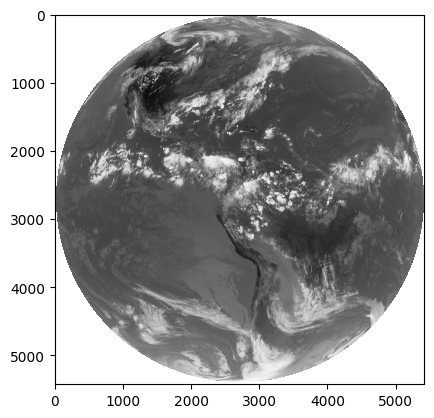

In [24]:
# Plot the raw GOES data
_ = plt.imshow(ds["CMI"], cmap="Greys")

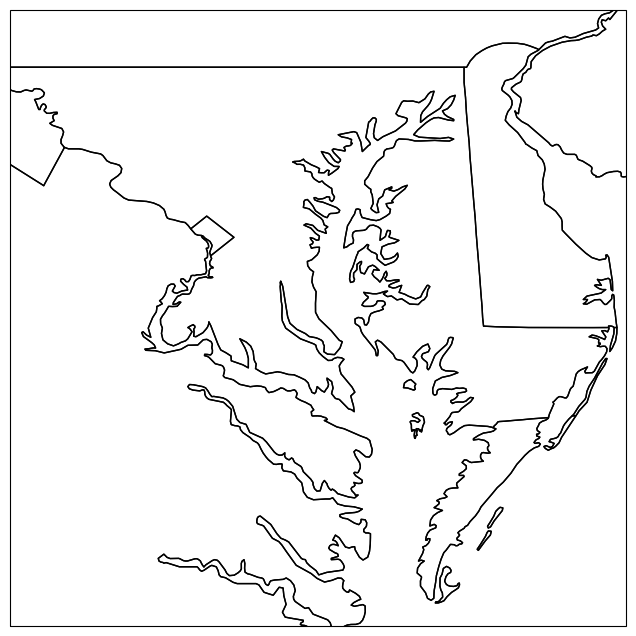

In [25]:
# Plot a basic map on a PlateCarree Projection
fig = plt.figure(figsize=(12, 8))
pc = ccrs.PlateCarree()
ax = fig.add_subplot(projection=pc, extent=(-78, -75, 37, 40))
ax.coastlines()
_ = ax.add_feature(cfeature.STATES)

In [26]:
# Define the Geostationary perspective coordinate system similar to before
transform = ccrs.Geostationary(
    central_longitude=cent_long, satellite_height=height, sweep_axis="x"
)

# Bounds of geostationary image in projection coordinates
x = ds.x.values
y = ds.y.values
extent = np.array([x.min(), x.max(), y.min(), y.max()])
extent *= height

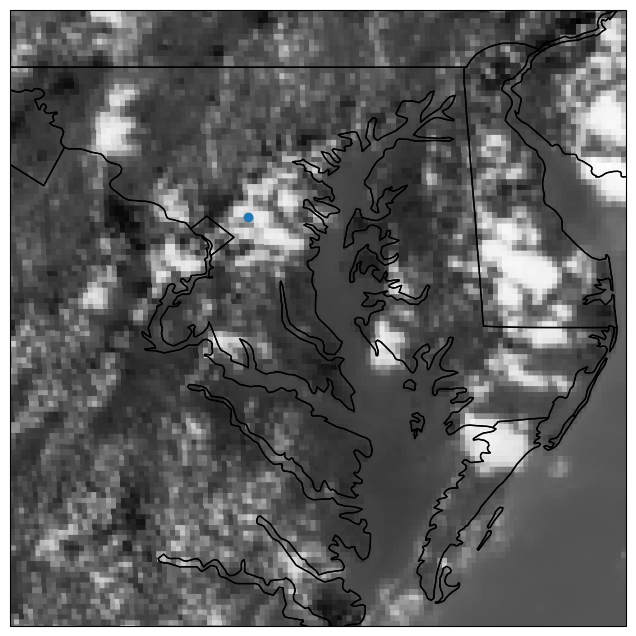

In [27]:
# Reproject the geostationary perspective on to a PlateCarree projection
fig = plt.figure(figsize=(12, 8))
pc = ccrs.PlateCarree()
ax = fig.add_subplot(projection=pc, extent=(-78, -75, 37, 40))
ax.coastlines()
ax.add_feature(cfeature.STATES)
ax.imshow(ds["CMI"], extent=extent, transform=transform, cmap="Greys")

# Cartopy will allow you to directly draw by specifying lat/lon
_ = ax.scatter(-76.840, 38.993)

## Measuring Distances

Pycontrails includes utility functions to compute great-circle distance using the haversine distance formula. This assumes that the Earth is a perfect sphere.  The example below shows the distance inscribed by a path around the majority of the globe:

In [28]:
import pycontrails.physics.geo as geo
lats = np.array([-72.9, -71.9, -74.9, -74.3, -77.5, -77.4, -71.7, -65.9, -65.7,
        -66.6, -66.9, -69.8, -70.0, -71.0, -77.3, -77.9, -74.7])
lons = np.array([-74, -102, -102, -131, -163, 163, 172, 140, 113,
        88, 59, 25, -4, -14, -33, -46, -61])
d = geo.haversine(lons[:-1],lats[:-1],lons[1:],lats[1:])
f"{sum(d):.3f}"

'14202950.807'

PyProj provides support to do the same computation over the WGS84 ellispoid:

In [29]:
from pyproj import Geod
lats = [-72.9, -71.9, -74.9, -74.3, -77.5, -77.4, -71.7, -65.9, -65.7,
        -66.6, -66.9, -69.8, -70.0, -71.0, -77.3, -77.9, -74.7]
lons = [-74, -102, -102, -131, -163, 163, 172, 140, 113,
        88, 59, 25, -4, -14, -33, -46, -61]
geod = Geod(ellps="WGS84")
total_length = geod.line_length(lons, lats)
f"{total_length:.3f}"

'14259605.611'

## Measuring Area

Easiest done using the [https://shapely.readthedocs.io/en/stable/](Shapely) library, which is a wrapper around [GOES](https://libgeos.org/).

Define an arbitrary geometry using Shapely:

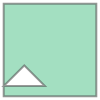

In [30]:
from shapely.geometry import LineString, Point, Polygon

poly = Polygon(
    LineString([Point(1, 1), Point(1, 10), Point(10, 10), Point(10, 1)]),
    holes=[LineString([Point(1, 2), Point(3, 4), Point(5, 2)])],
)
poly

Compute the area and perimeter of this shape.  Note that the sign of the area just corresponds to ordering of the verticies of the polygon

In [31]:
geod = Geod(ellps="WGS84")
poly_area, poly_perimeter = geod.geometry_area_perimeter(poly)
f"{poly_area:.3f} m    {poly_perimeter:.3f} m"

'-1042749262335.512 m    3979008.036 m'